# TP2 Louis Hémadou

# Get Data and load packages

In [1]:
import pandas as pd
import numpy as np
#from google.colab import files

In [2]:
#files.upload()

In [3]:
data = pd.read_csv('./housedata/data.csv')

In [4]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


# Preprocessing
Convert date to int

In [5]:
data['date_int'] = pd.to_datetime(data['date']).dt.strftime("%Y%m%d").astype(int)

Convert cities to one hot

In [6]:
city = pd.get_dummies(pd.Categorical(data['city']), prefix='city')

convert observation to numpy

In [7]:
X = np.concatenate([data[['date_int', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']].to_numpy(), city.to_numpy()], axis=1)

In [8]:
X.shape

(4600, 57)

convert price to numpy

In [9]:
Y = data['price'].to_numpy()
Y.shape

(4600,)

split train/val/test sets

In [10]:
r = np.random.permutation(len(X))
X_train = X[r[0:3500], :]
Y_train = Y[r[0:3500]]
X_val = X[r[3500:4000], :]
Y_val = Y[r[3500:4000]]
X_test = X[r[4000:], :]
Y_test = Y[r[4000:]]

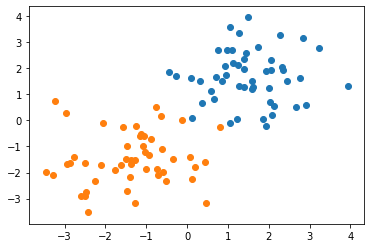

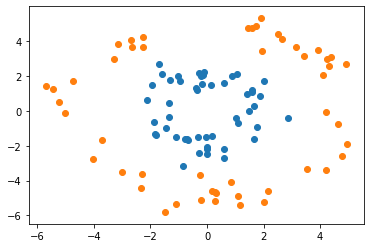

In [11]:
import matplotlib.pyplot as plt

# Generation functions, useful to test algorithms

def gen_points(n, mu_1, K_1, mu_2, K_2, visualise = True):
    """ Generates two gaussian clouds of points"""
    X_1 = np.random.multivariate_normal(mu_1, K_1, n_points) # First cloud
    Y_1 = np.ones(n)
    X_2 = np.random.multivariate_normal(mu_2, K_2, n_points) # Second cloud
    Y_2 = - np.ones(n)
    X = np.concatenate((X_1, X_2), axis = 0)
    Y = np.concatenate((Y_1, Y_2), axis = 0)
    r = np.random.permutation(2*n)
    X = X[r[0:2*n], :]
    Y = Y[r[0:2*n]]
    if visualise:
        plt.figure(1)
        plt.scatter(X_1.T[0], X_1.T[1])
        plt.scatter(X_2.T[0], X_2.T[1])
        plt.show()
    return X_1, Y_1, X_2, Y_2, X, Y


mu_1 = (1.5, 1.5)
K_1 = np.eye(2)
mu_2 = (-1.5, -1.5)
K_2 = np.eye(2)
n_points = 50

X_1, Y_1, X_2, Y_2, X, Y = gen_points(n_points, mu_1, K_1, mu_2, K_2, True)


def gen_points_2(n, mu_1, sig_1, mu_2, sig_2, visualise = True):
    """Generates two rings of points"""
    r_1 = np.random.normal(mu_1, sig_1, n_points)
    theta_1 = np.random.uniform(0, 2*np.pi, n_points)
    X_1 = np.stack((r_1*np.cos(theta_1), r_1*np.sin(theta_1)), axis = 1) # First ring
    Y_1 = np.ones(n)
    r_2 = np.random.normal(mu_2, sig_2, n_points)
    theta_2 = np.random.uniform(0, 2*np.pi, n_points)
    X_2 = np.stack((r_2*np.cos(theta_2), r_2*np.sin(theta_2)), axis = 1) # Second ring
    Y_2 = - np.ones(n)
    X = np.concatenate((X_1, X_2), axis = 0)
    Y = np.concatenate((Y_1, Y_2), axis = 0)
    r = np.random.permutation(2*n)
    X = X[r[0:2*n], :]
    Y = Y[r[0:2*n]]
    if visualise:
        plt.figure(2)
        plt.scatter(X_1.T[0], X_1.T[1])
        plt.scatter(X_2.T[0], X_2.T[1])
        plt.show()
    return X_1, Y_1, X_2, Y_2, X, Y

mu_1 = 2
sig_1 = 0.5
mu_2 = 5
sig_2 = 0.5
n_points = 50

X_1, Y_1, X_2, Y_2, X, Y = gen_points_2(n_points, mu_1, sig_1, mu_2, sig_2, True)

In [12]:
def add_ones(X):
    """ Adds a column of ones in the beginning of X"""
    new_X = np.array([np.ones(X.shape[0])] + [sample for sample in X.T])
    return new_X.T

def verify_bool(Y, Y_pred):
    """ Prints the percentage of good
    predictions of Y_pred"""
    assert(len(Y) == len(Y_pred))
    n = len(Y)
    good = 0
    for i in range(n):
        if Y[i] == Y_pred[i]:
            good += 1
    print(str(100*good/n) + " % accuracy")
    
class SAGClassifier():
    def __init__(self, lamb = 0.001, delta = 0.01):
        self.lamb = lamb # Regularization
        self.delta = delta # Learning rate
        self.w = None # Weights and biais
    
    def fit(self, X, Y, epochs = 100, Visual = False):

        def Loss(w, lamb, X, Y):
            n = X.shape[0]
            return (1/n) * sum((max(0, 1 - Y[i]*np.dot(w, X[i])) for i in range(n))) + lamb * np.linalg.norm(w)**2

        def grad_f(w, x_i, y_i):
            if y_i * np.dot(w, x_i) >= 1:
                return 0
            else:
                return -y_i * x_i     
            
        X_ones = add_ones(X)
        n, p = X_ones.shape
        d = np.zeros(p)
        z = np.zeros((n, p)) # Remembering gradients
        self.w = np.zeros(p)
        visit = np.zeros(n) # Visited samples
        loss_values = []
        for k in range(epochs):
            i = np.random.randint(0, n)
            visit[i] = 1
            d = d - z[i] + grad_f(self.w, X_ones[i], Y[i])
            z[i] = grad_f(self.w, X_ones[i], Y[i])
            m = np.sum(visit)
            reg = self.w
            reg[0] = 0 # Do not regularize biais
            self.w = self.w - self.lamb*self.delta*reg - (self.delta/m) * d
            loss_values.append(np.linalg.norm(Loss(self.w, self.lamb, X_ones, Y)))
            print('training, iteration: '+str(k+1)+'/'+str(epochs)+'\r', sep=' ', end='', flush=True)
            
        if Visual:
            it = range(len(loss_values))
            plt.figure()
            plt.plot(it, loss_values, 'r')
            plt.title("Loss over epochs")
            plt.show()
            
    def predict(self, X):
        X_ones = add_ones(X)
        Y_pred = np.dot(X_ones, self.w)
        Y_pred = Y_pred / np.abs(Y_pred)
        return Y_pred
    
    def weights(self):
        return self.w

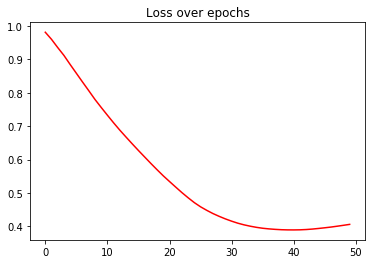

100.0 % accuracy


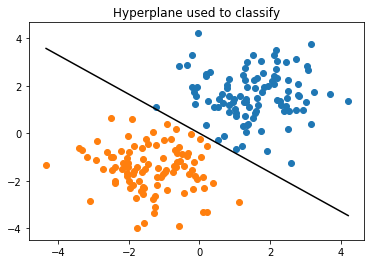

In [13]:
# Parameters for 2D classification
mu_1 = (1.5, 1.5)
K_1 = np.eye(2)
mu_2 = (-1.5, -1.5)
K_2 = np.eye(2)
n_points = 100

X1t, Y1t, X2t, Y2t, Xt, Yt = gen_points(n_points, mu_1, K_1, mu_2, K_2, False) # Training dataset
X1v, Y1v, X2v, Y2v, Xv, Yv = gen_points(n_points, mu_1, K_1, mu_2, K_2, False) # Validation dataset


sag = SAGClassifier(lamb = 1, delta = 0.005)
sag.fit(Xt, Yt, epochs = 50, Visual = True)
Y_pred = sag.predict(Xv)
verify_bool(Yv, Y_pred)

def show2DLinear(w, X_1, X_2):
    """ Shows the carthesian line
    with coefficients w"""
    b, w_1, w_2 = w
    x_min = min(np.min(X_1.T[0]), np.min(X_2.T[0]))
    x_max = max(np.max(X_1.T[0]), np.max(X_2.T[0]))
    x_values = np.linspace(x_min, x_max, 100)
    y_values = [-(w_1/w_2)*x - b/w_2 for x in x_values]
    plt.figure(1)
    plt.scatter(X_1.T[0], X_1.T[1])
    plt.scatter(X_2.T[0], X_2.T[1])
    plt.plot(x_values, y_values, 'k')
    plt.title("Hyperplane used to classify")
    plt.show()

w = sag.weights()
show2DLinear(w, X1v, X2v)

In [14]:
def accuracy(Y_pred, Y):
    """Measures accuracy of a
    regression prediction"""
    error = np.abs(Y_pred - Y)
    print(str(100*np.mean(error)/np.mean(Y)) + " % experimental error") # Mean experimental error  

class SAGRegressor():
    def __init__(self, lamb = 0.001, delta = 0.01):
        self.lamb = lamb # Regularization
        self.delta = delta # Learning rate
        self.w = None # Weights and biais
    
    def fit(self, X, Y, epochs = 100, Visual = False):

        def Loss(w, lamb, X, Y):
            n = X.shape[0]
            return (1/n) * sum(((Y[i] - np.dot(w, X[i]))**2 for i in range(n))) + lamb * np.linalg.norm(w)**2

        def grad_f(w, x_i, y_i):
            return -2*x_i*(y_i - np.dot(w, x_i))
            
        X_ones = add_ones(X)
        n, p = X_ones.shape
        d = np.zeros(p)
        z = np.zeros((n, p)) # Remembering gradients
        self.w = np.zeros(p)
        visit = np.zeros(n) # Visited samples
        loss_values = []
        for k in range(epochs):
            i = np.random.randint(0, n)
            visit[i] = 1
            d = d - z[i] + grad_f(self.w, X_ones[i], Y[i])
            z[i] = grad_f(self.w, X_ones[i], Y[i])
            m = np.sum(visit)
            reg = self.w
            reg[0] = 0
            self.w = self.w - self.lamb*self.delta*reg - (self.delta/m) * d
            loss_values.append(np.linalg.norm(Loss(self.w, self.lamb, X_ones, Y)))
            print('training, iteration: '+str(k+1)+'/'+str(epochs)+'\r', sep=' ', end='', flush=True)
            
        if Visual:
            it = range(len(loss_values))
            plt.figure()
            plt.plot(it, loss_values, 'r')
            plt.title("Loss over epochs")
            plt.show()
            
    def predict(self, X):
        X_ones = add_ones(X)
        Y_pred = np.dot(X_ones, self.w)
        return Y_pred
    
    def weights(self):
        return self.w

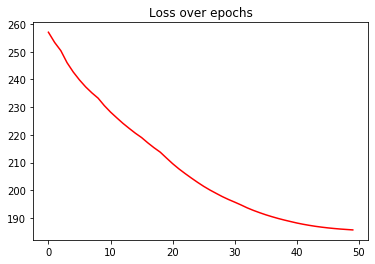

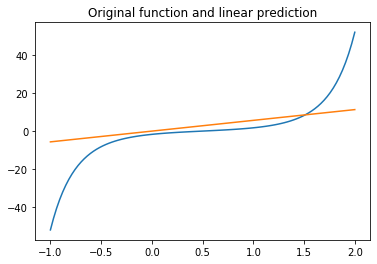

In [15]:
def f(x): # Function to regress
    return np.exp(x**2) - np.exp((x-1)**2)

n_points = 100
X = np.array(np.linspace(-1, 2, n_points))
X.shape = (n_points, 1)
Y = f(X)

sag = SAGRegressor(lamb = 1, delta = 0.005)
sag.fit(X, Y, epochs = 50, Visual = True)
Y_pred = sag.predict(X)

plt.figure()
plt.plot(X, Y)
plt.plot(X, Y_pred)
plt.title("Original function and linear prediction")
plt.show()

In [16]:
class SDCAClassifier():
    def __init__(self, kernel, param, C = 10):
        self.kernel = kernel
        self.param = param
        self.C = C
        self.X = None
        self.Y = None
        self.alpha = None
        
    def fit(self, X, Y, epochs = 10, Visual = False):
        
        def dual_Loss(alpha, X, Y, k):
            n = X.shape[0]
            return sum(alpha) - (1/2)*sum([alpha[i]*alpha[j]*Y[i]*Y[j]*k(X[i], X[j], self.param) for i in range(n) for j in range(n)])
        
        X_ones = add_ones(X)
        n, p = X_ones.shape
        self.alpha = np.zeros(n)
        self.Y = Y
        self.X = X_ones
        loss_values = []
        for k in range(epochs):
            perm = np.random.permutation(n)
            for i in perm:
                z_i = Y[i] * sum([self.alpha[j]*Y[j]*self.kernel(X_ones[i], X_ones[j], self.param) for j in range(n)])
                self.alpha[i] = self.alpha[i] + (1 - z_i) / self.kernel(X_ones[i], X_ones[i], self.param)
                self.alpha[i] = max(0, min(self.C, self.alpha[i]))
                print('training, iteration: '+str(k+1)+'/'+str(epochs)+'\r', sep=' ', end='', flush=True)
                if Visual:
                    loss_values.append(dual_Loss(self.alpha, X_ones, Y, self.kernel))
        print('\n')
        if Visual:
            it = range(len(loss_values))
            plt.figure()
            plt.plot(it, loss_values, 'r')
            plt.title("Loss over epochs")
            plt.show()
            
    def predict(self, X):
        X_ones = add_ones(X)
        n = self.X.shape[0]
        m = X_ones.shape[0]
        Y_pred = np.array([sum([self.alpha[i]*self.Y[i]*self.kernel(self.X[i], X_ones[j], self.param) for i in range(n)]) for j in range(m)])
        Y_pred = Y_pred / np.abs(Y_pred) # To return only -1 or 1
        return Y_pred
    
    def weights(self):
        return self.alpha

training, iteration: 10/10

93.5 % accuracy


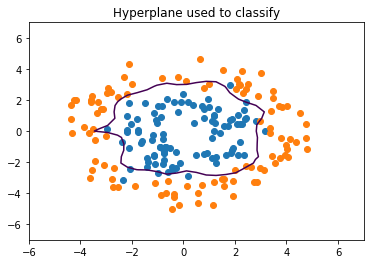

In [17]:
def poly_kernel(x1, x2, param):
    return np.dot(x1, x2)**param

def gauss_kernel(x1, x2, param):
    return np.exp(- param * np.linalg.norm(x1 - x2)**2)

# Parameters for 2D classification

mu_1 = 2
sig_1 = 0.5
mu_2 = 4
sig_2 = 0.5
n_points = 100

X1t, Y1t, X2t, Y2t, Xt, Yt = gen_points_2(n_points, mu_1, sig_1, mu_2, sig_2, False) # Training data set
X1v, Y1v, X2v, Y2v, Xv, Yv = gen_points_2(n_points, mu_1, sig_1, mu_2, sig_2, False) # Validation data set


sdca = SDCAClassifier(gauss_kernel, param = 2, C = 10)
sdca.fit(Xt, Yt, epochs = 10, Visual = False) # Computing loss function takes too much time here
alpha = sdca.weights()
Y_pred = sdca.predict(Xv)
verify_bool(Yv, Y_pred)

def show_hyperplane(X_1, X_2, X, Y, alpha, ker, param, m):
    """Shows the hyperplane the algorithm uses to
    predict"""
    X_ones = add_ones(X)
    X_12 = np.concatenate((X_1, X_2), axis = 0)
    
    # Retrieving dimensions
    
    x_min = int((3/2)*np.min(X_12.T[0]))
    x_max = int((3/2)*np.max(X_12.T[0]))
    y_min = int((3/2)*np.min(X_12.T[1]))
    y_max = int((3/2)*np.max(X_12.T[1]))
    
    def pred(x,y): # Prediction at the point (x,y) on the plane
        n = X_ones.shape[0]
        return sum([alpha[i]*Y[i]*ker(X_ones[i], np.array([1, x, y]), param) for i in range(n)])
    
    x_val = np.linspace(x_min, x_max, m)
    y_val = np.linspace(y_min, y_max, m)
    z_val = np.array([[pred(x,y) for x in x_val] for y in y_val])
    
    plt.figure(4)
    plt.scatter(X_1.T[0], X_1.T[1])
    plt.scatter(X_2.T[0], X_2.T[1]) 
    plt.contour(x_val, y_val, z_val, [0]) # Points where prediction fonction returns 0
    plt.title("Hyperplane used to classify")
    plt.show()
    
show_hyperplane(X1v, X2v, Xt, Yt, alpha, gauss_kernel, 2, 35)

In [18]:
class SDCARegressor():
    def __init__(self, kernel, param, C = 10):
        self.kernel = kernel
        self.param = param
        self.C = C
        self.X = None
        self.Y = None
        self.alpha = None
        
    def fit(self, X, Y, epochs = 100, Visual = False):
        
        def dual_Loss(alpha, X, Y, k):
            n = X.shape[0]
            return sum([alpha[i]*Y[i] - (alpha[i]**2)/4 for i in range(n)]) - (1/(2*self.C))*sum([alpha[i]*alpha[j]*k(X[i], X[j], self.param) for i in range(n) for j in range(n)])
        
        X_ones = add_ones(X)
        n, p = X_ones.shape
        self.alpha = np.zeros(n)
        self.Y = Y
        self.X = X_ones
        loss_values = []
        for k in range(epochs):
            perm = np.random.permutation(n)
            for i in perm:
                delta_i = (self.Y[i] - sum([self.alpha[j]*self.kernel(self.X[i], self.X[j], self.param) for j in range(n)]) - (1/2)*self.alpha[i])/((1/2) + self.kernel(self.X[i], self.X[i], self.param)/self.C)
                self.alpha[i] = self.alpha[i] + delta_i
                print('training, iteration: '+str(k+1)+'/'+str(epochs)+'\r', sep=' ', end='', flush=True)
                if Visual:
                    loss_values.append(dual_Loss(self.alpha, X_ones, Y, self.kernel))
            
        if Visual:
            it = range(len(loss_values))
            plt.figure()
            plt.plot(it, loss_values, 'r')
            plt.title("Loss over epochs")
            plt.show()
            
    def predict(self, X):
        X_ones = add_ones(X)
        n = self.X.shape[0]
        m = X_ones.shape[0]
        Y_pred = np.array([sum([(1/self.C)*self.alpha[i]*self.kernel(self.X[i], X_ones[j], self.param) for i in range(n)]) for j in range(m)])
        return Y_pred
    
    def weights(self):
        return self.alpha

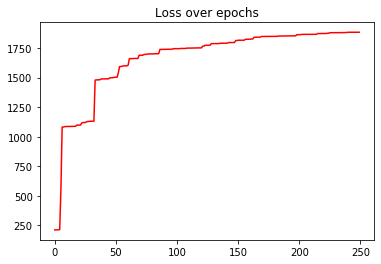

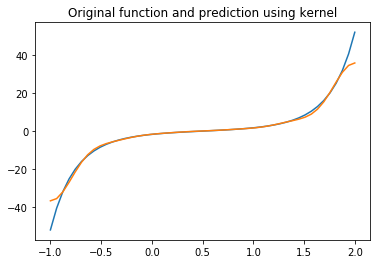

In [19]:
def f(x): # Function to regress
    return np.exp(x**2) - np.exp((x-1)**2)

n_points = 50
X = np.array(np.linspace(-1, 2, n_points))
X.shape = (n_points, 1)
Y = f(X)

sdca = SDCARegressor(gauss_kernel, param = 10, C = 1)
sdca.fit(X, Y, epochs = 5, Visual = True)
Y_pred = sdca.predict(X)

plt.figure()
plt.plot(X, Y)
plt.plot(X, Y_pred)
plt.title("Original function and prediction using kernel")
plt.show()

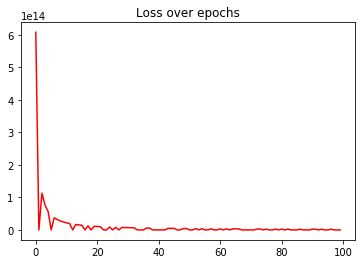

49.6 % accuracy


In [20]:
# Testing SAGClassifier on house data

med_price = np.median(Y_train)
n_points = 100
Y_train_bool = 2*(Y_train > med_price).astype(int)-1
Y_val_bool = 2*(Y_val > med_price).astype(int)-1

# Raw data

sag = SAGClassifier(lamb = 1, delta = 1)
sag.fit(X_train, Y_train_bool, epochs = 100, Visual = True)
Y_pred = sag.predict(X_val)
verify_bool(Y_val_bool, Y_pred)

In [21]:
from tools import standardize, normalize, pca

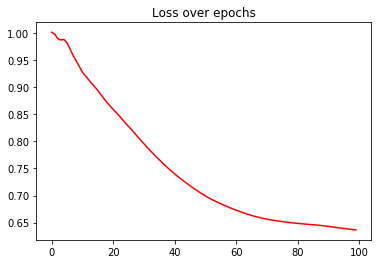

74.6 % accuracy


In [22]:
# Standardized data

X_train_s = standardize(X_train)
X_val_s = standardize(X_val)

sag = SAGClassifier(lamb = 0.01, delta = 0.01)
sag.fit(X_train_s, Y_train_bool, epochs = 100, Visual = True)
Y_pred = sag.predict(X_val_s)
verify_bool(Y_val_bool, Y_pred)

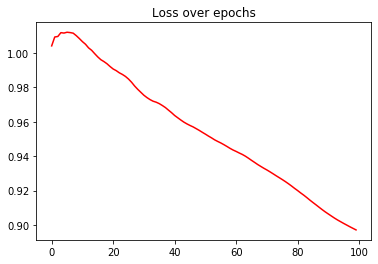

64.8 % accuracy


In [23]:
# Normalized data

X_train_n = normalize(X_train)
X_val_n = normalize(X_val)

sag = SAGClassifier(lamb = 0.01, delta = 0.1)
sag.fit(X_train_n, Y_train_bool, epochs = 100, Visual = True)
Y_pred = sag.predict(X_val_n)
verify_bool(Y_val_bool, Y_pred)

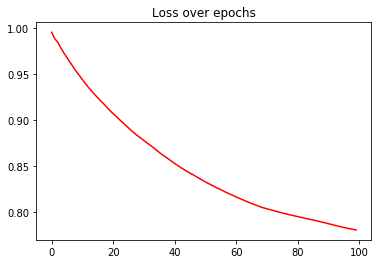

57.0 % accuracy


In [24]:
# Standardized and orthogonalized data

n_comp = 45
X_train_pca = pca(standardize(X_train), n_comp)
X_val_pca = pca(standardize(X_val), n_comp)

sag = SAGClassifier(lamb = 0.01, delta = 0.01)
sag.fit(X_train_pca, Y_train_bool, epochs = 100, Visual = True)
Y_pred = sag.predict(X_val_pca)
verify_bool(Y_val_bool, Y_pred)

Même en optimisant les paramètres, les résultats avec les données brutes sont très mauvais. On obtient des résultats bons, comparables au kNN ou à la régression logistique avec des données simplement standardisées.

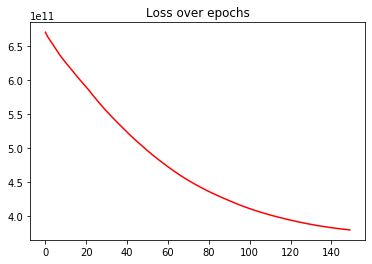

49.02383417211681 % experimental error


In [25]:
# Testing SAGRegressor

# Raw data

sag = SAGRegressor(lamb = 1e-13, delta = 1e-17)
sag.fit(X_train, Y_train, epochs = 150, Visual = True)
Y_pred = sag.predict(X_val)
accuracy(Y_val, Y_pred)

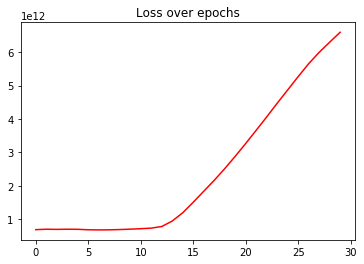

8769.13418986383 % experimental error


In [26]:
# Standardized data

X_train_s = standardize(X_train)
X_val_s = standardize(X_val)

sag = SAGRegressor(lamb = 1e-1, delta = 1e-2)
sag.fit(X_train_s, Y_train, epochs = 30, Visual = True)
Y_pred = sag.predict(X_val_s)
accuracy(Y_val, Y_pred)

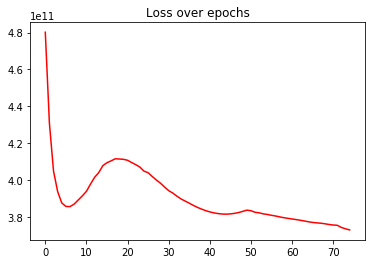

36.191437623237384 % experimental error


In [27]:
# Normalized data

X_train_n = normalize(X_train)
X_val_n = normalize(X_val)

sag = SAGRegressor(lamb = 1e-1, delta = 5e-2)
sag.fit(X_train_n, Y_train, epochs = 75, Visual = True)
Y_pred = sag.predict(X_val_n)
accuracy(Y_val, Y_pred)

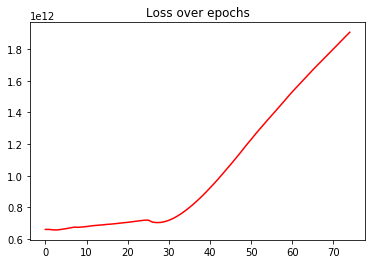

7733.054299357801 % experimental error


In [28]:
# Standardized and orthogonalized data

n_comp = 45
X_train_pca = pca(standardize(X_train), n_comp)
X_val_pca = pca(standardize(X_val), n_comp)

sag = SAGRegressor(lamb = 1e-3, delta = 1e-2)
sag.fit(X_train_pca, Y_train, epochs = 75, Visual = True)
Y_pred = sag.predict(X_val_pca)
accuracy(Y_val, Y_pred)

Ici, il est impossible d'obtenir des résultats cohérents avec des données standardisées. On obtient des résultats assez peu convaincants avec des données brutes ou des données normalisées.

In [29]:
# Testing SDCAClassifier on house prices

med_price = np.median(Y_train)
n_points = 400
Y_train_bool = 2*(Y_train > med_price).astype(int)-1
Y_val_bool = 2*(Y_val > med_price).astype(int)-1

n_points = 100
X_train2 = X_train[:n_points] # Subsampling to avoid long execution time
Y_train2 = Y_train[:n_points]

med_price = np.median(Y_train2)
n_points = 100
Y_train_bool = 2*(Y_train2 > med_price).astype(int)-1
Y_val_bool = 2*(Y_val > med_price).astype(int)-1

# Raw data

sdca = SDCAClassifier(gauss_kernel, param = 5, C = 1)
sdca.fit(X_train2, Y_train_bool, epochs = 10, Visual = False) # Computing loss takes a lot of time
Y_pred = sdca.predict(X_val)
verify_bool(Y_val_bool, Y_pred)

training, iteration: 10/10

0.0 % accuracy


/home/zelire/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


In [30]:
# Standardized data

X_train_s = standardize(X_train2)
X_val_s = standardize(X_val)

sdca = SDCAClassifier(gauss_kernel, param = 5, C = 1)
sdca.fit(X_train_s, Y_train_bool, epochs = 10, Visual = False) # Computing loss takes a lot of time
Y_pred = sdca.predict(X_val_s)
verify_bool(Y_val_bool, Y_pred)

training, iteration: 10/10

63.2 % accuracy


/home/zelire/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


In [31]:
# Normalized data

X_train_n = normalize(X_train2)
X_val_n = normalize(X_val)

sdca = SDCAClassifier(gauss_kernel, param = 5, C = 1)
sdca.fit(X_train_n, Y_train_bool, epochs = 10, Visual = False) # Computing loss takes a lot of time
Y_pred = sdca.predict(X_val_n)
verify_bool(Y_val_bool, Y_pred)

training, iteration: 10/10

65.4 % accuracy


In [32]:
# Standardized and orthogonalized data

n_comp = 40
X_train_pca = pca(standardize(X_train2), n_comp)
X_val_pca = pca(standardize(X_val), n_comp)

sdca = SDCAClassifier(gauss_kernel, param = 5, C = 1)
sdca.fit(X_train_pca, Y_train_bool, epochs = 10, Visual = False) # Computing loss takes a lot of time
Y_pred = sdca.predict(X_val_pca)
verify_bool(Y_val_bool, Y_pred)

training, iteration: 10/10

41.6 % accuracy


/home/zelire/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


Les résultats ici sont assez médiocres, en particulier pour les données brutes et les données standardisées et orthogonalisées. Il faut cependant prendre en compte le fait que nous avons effectué l'apprentissage sur un sous-échantillon pour réduire le temps de calcul.

In [33]:
# Testing SDCARegressor on house prices

n_points = 100
X_train2 = X_train[:n_points] # Subsampling to avoid long execution time
Y_train2 = Y_train[:n_points]

# Raw data

sdca = SDCARegressor(gauss_kernel, param = 0.01, C = 1)
sdca.fit(X_train2, Y_train, epochs = 5, Visual = False) # Computing loss takes a lot of time
Y_pred = sdca.predict(X_val)
accuracy(Y_val, Y_pred)

834300394.173983 % experimental error


In [34]:
# Standardized data

X_train_s = standardize(X_train2)
X_val_s = standardize(X_val)
                      
sdca = SDCARegressor(gauss_kernel, param = 0.01, C = 1)
sdca.fit(X_train_s, Y_train, epochs = 10, Visual = False) # Computing loss takes a lot of time
Y_pred = sdca.predict(X_val_s)
accuracy(Y_val, Y_pred)                      

32.72814408761322 % experimental error


In [35]:
# Normalized data

X_train_n = normalize(X_train2)
X_val_n = normalize(X_val)

sdca = SDCARegressor(gauss_kernel, param = 0.01, C = 1)
sdca.fit(X_train_n, Y_train, epochs = 10, Visual = False) # Computing loss takes a lot of time
Y_pred = sdca.predict(X_val_n)
accuracy(Y_val, Y_pred) 

33.80424840365594 % experimental error


In [36]:
# Standardized and orthogonalized data

n_comp = 40
X_train_pca = pca(standardize(X_train2), n_comp)
X_val_pca = pca(standardize(X_val), n_comp)

sdca = SDCARegressor(gauss_kernel, param = 0.01, C = 1)
sdca.fit(X_train_pca, Y_train, epochs = 10, Visual = False) # Computing loss takes a lot of time
Y_pred = sdca.predict(X_val_pca)
accuracy(Y_val, Y_pred) 

73.47152042113738 % experimental error


On voit ici un véritable bénéfice à ajouter un noyau à notre svm. On obtient en effet des résultats sur la régression bien meilleurs (au moins pour les données standardisées ou normalisées), malgré la réduction de l'ensemble d'entrainement.